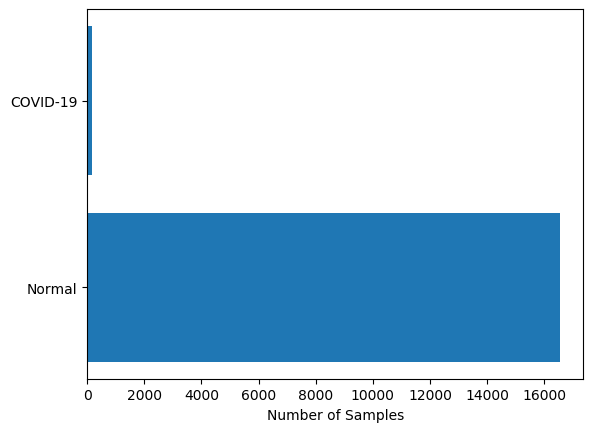

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('COVID-19', 'Normal')
y_pos = np.arange(len(people))
performance = [180, 16537]

p = ax.barh(y_pos, performance, align='center', height=0.8)
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis() 
ax.set_xlabel('Number of Samples')

plt.show()

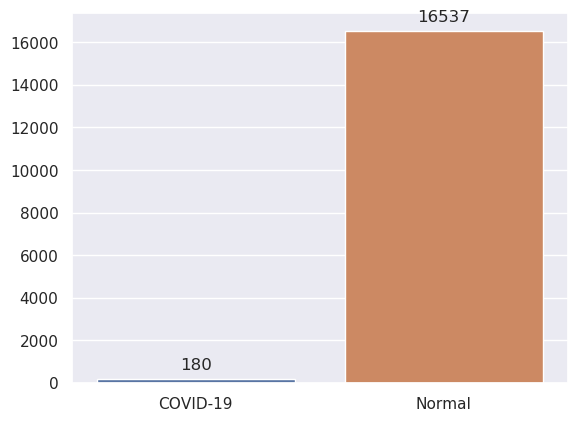

In [2]:
import seaborn as sns

sns.set()

classes = ('COVID-19', 'Normal')
y_pos = np.arange(len(people))
cts = [180, 16537]

ax = sns.barplot(y_pos, cts)
ax.set_xticks(y_pos)
ax.set_xticklabels(classes)



for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ''), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


#ax.invert_yaxis()

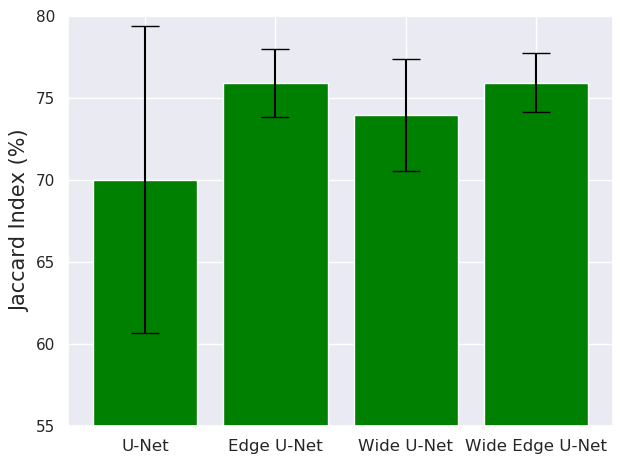

In [3]:
# Create lists for the plot

techs = ['U-Net', 'Edge U-Net', 'Wide U-Net', 'Wide Edge U-Net']
means = [70.0217, 75.8923, 73.9754, 75.9263]
stds = [9.3723, 2.0695, 3.4125, 1.8024]

#70.0217% +/- 9.3723%
#75.8923% +/- 2.0695%
#73.9754% +/- 3.4125%
#75.9263% +/- 1.8024%


x_pos = np.arange(len(techs))
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=1, color='green', ecolor='black', capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(techs, fontsize=12)
ax.set_ylabel('Jaccard Index (%)', fontsize=15)
#ax.set_title('Mean ACC and STD from 10-fold cross validation', fontsize=12)
ax.set_ylim([55, 80])
ax.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig("./logs/barplot_1.pdf", dpi=300)
plt.show()

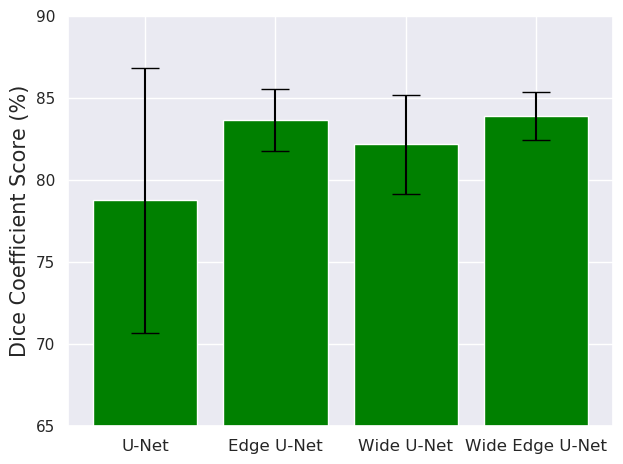

In [4]:
# Create lists for the plot

techs = ['U-Net', 'Edge U-Net', 'Wide U-Net', 'Wide Edge U-Net']
means = [78.7514, 83.6510, 82.1686, 83.8992]
stds = [8.1050, 1.8840, 3.0006, 1.4904]

# 78.7514% +/- 8.1050%
# 83.6510% +/- 1.8840%
# 82.1686% +/- 3.0006%
# 83.8992% +/- 1.4904%

x_pos = np.arange(len(techs))
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', color='green', ecolor='black', capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(techs, fontsize=12)
ax.set_ylabel('Dice Coefficient Score (%)', fontsize=15)
#ax.set_title('Mean ACC and STD from 10-fold cross validation', fontsize=12)
ax.set_ylim([65, 90])
ax.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig("./logs/barplot_2.pdf", dpi=300)
plt.show()

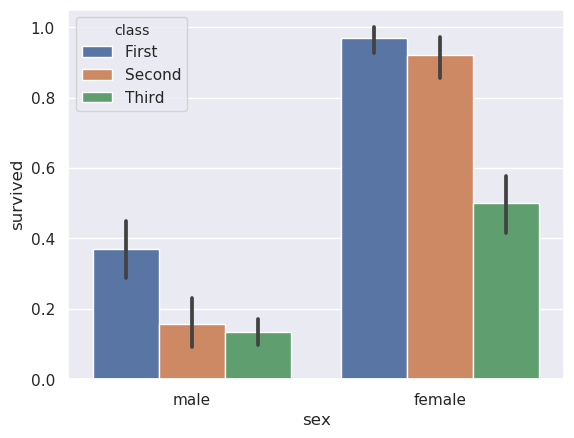

In [5]:
titanic_dataset = sns.load_dataset("titanic")
sns.barplot(x='sex', y='survived', hue = 'class', data=titanic_dataset)

In [6]:
titanic_dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
import matplotlib.ticker as tick

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

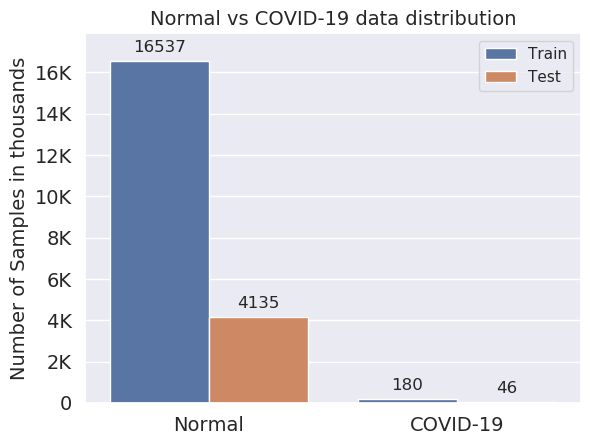

In [8]:
import pandas as pd
d = {'Class': ["Normal", "Normal", "COVID-19", "COVID-19"], 'Number of Samples': [16537, 4135,180, 46], 'Type': ["Train", "Test", "Train", "Test"]}
df = pd.DataFrame(data=d)


#ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
stds = [100, 100, 100, 100]

ax = sns.barplot(x='Class', y='Number of Samples', hue = 'Type', data=df, errwidth=0)
ax.tick_params(axis='both', labelsize=14)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.ylabel("Number of Samples in thousands", fontsize=14)
plt.xlabel(None)
plt.ylim(0, 17900)
plt.legend(title=None)

plt.title("Normal vs COVID-19 data distribution", fontsize=14)

for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ''), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#plt.savefig("{}/nvc_hist.pdf".format(log_path), bbox_inches = 'tight', dpi=300)

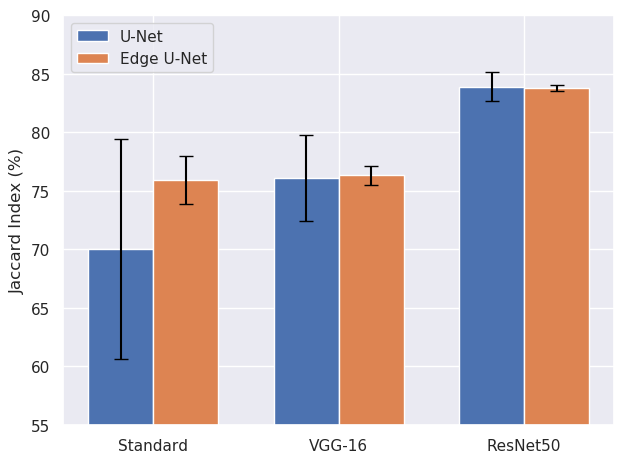

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Standard', 'VGG-16', 'ResNet50']
unet = [70.0217, 76.0770, 83.8797]
edge_unet = [75.8923, 76.3316, 83.7544]

unet_stds = [9.3723, 3.6895, 1.2572]
edgeunet_stds = [2.0695, 0.8090, 0.2702]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unet, width, yerr=unet_stds, align='center', ecolor='black', label='U-Net', capsize=5)
rects2 = ax.bar(x + width/2, edge_unet, width, yerr=edgeunet_stds, align='center', ecolor='black', label='Edge U-Net', capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Jaccard Index (%)', fontsize=12)
ax.set_xticks(x)
ax.set_ylim([55, 90])
ax.set_xticklabels(labels)
ax.legend()

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')
#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

# Save the figure and show
plt.tight_layout()
plt.savefig("./logs/barplot_backbones_jaccard.pdf", dpi=300)
plt.show()

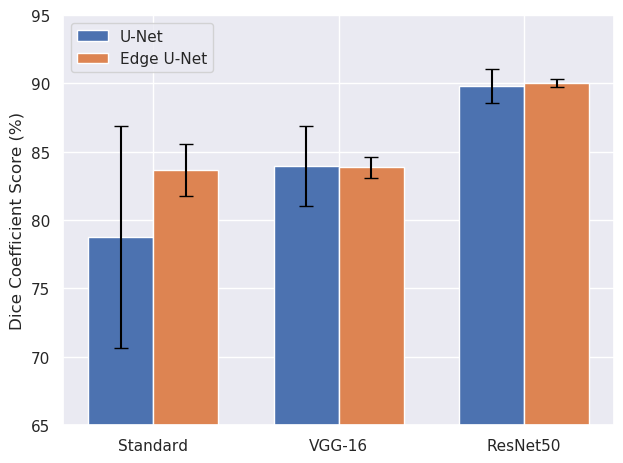

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Standard', 'VGG-16', 'ResNet50']
unet = [78.7514, 83.9517, 89.8346]
edge_unet = [83.6510, 83.8423, 90.0500]

unet_stds = [8.1050, 2.9548, 1.2473]
edgeunet_stds = [1.8840, 0.7485, 0.2965]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unet, width, yerr=unet_stds, align='center', ecolor='black', label='U-Net', capsize=5)
rects2 = ax.bar(x + width/2, edge_unet, width, yerr=edgeunet_stds, align='center', ecolor='black', label='Edge U-Net', capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Dice Coefficient Score (%)', fontsize=12)
ax.set_xticks(x)
ax.set_ylim([65, 95])
ax.set_xticklabels(labels)
ax.legend()

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')
#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

# Save the figure and show
plt.tight_layout()
plt.savefig("./logs/barplot_backbones_dice.pdf", dpi=300)
plt.show()